# РК №1 Гурова Мария ИУ5-65Б
Вариант №3
Задача №1 
Набор данных №3

Задача №1.

Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('/Users/elenavisneva/Desktop/toy_dataset.csv')

In [3]:
print(data.shape)
data.head()

(150000, 6)


,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [4]:
data.dtypes

Number       int64
City        object
Gender      object
Age          int64
Income     float64
Illness     object
dtype: object

Количество уникальных значений для каждого столбца:

In [5]:
data.nunique()

Number     150000
City            8
Gender          2
Age            41
Income      71761
Illness         2
dtype: int64

In [6]:
data.isna().sum()

Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

Вывод: нулевых значений в датасете нет, как и неправильных типов. 
## Визуализируем данные:

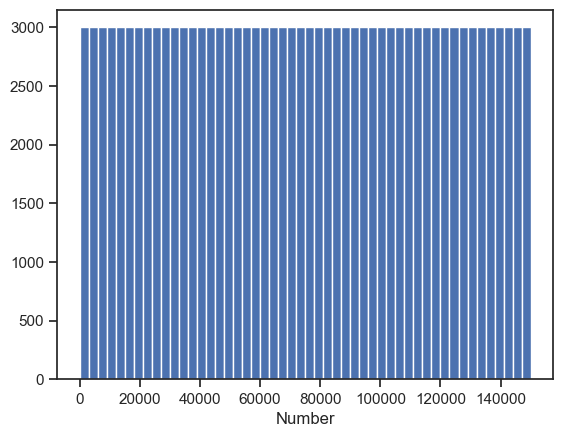

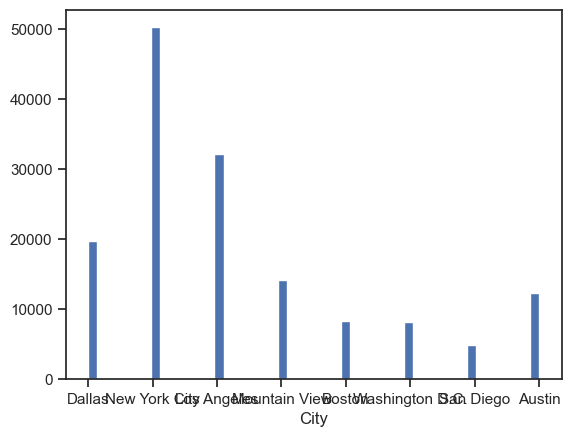

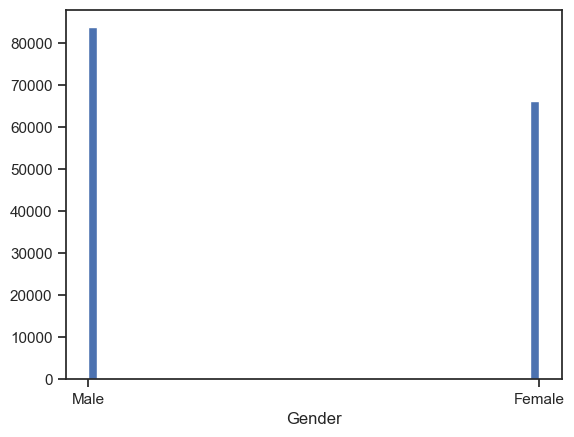

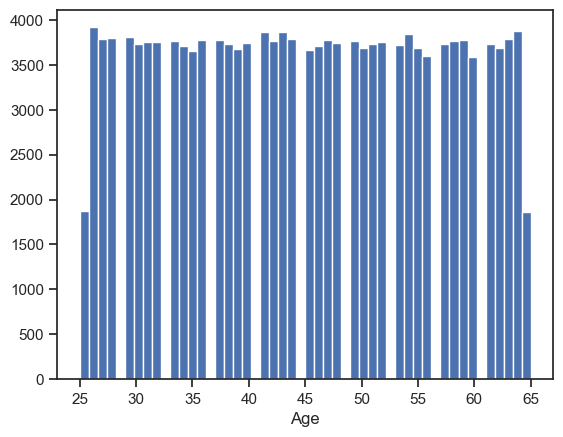

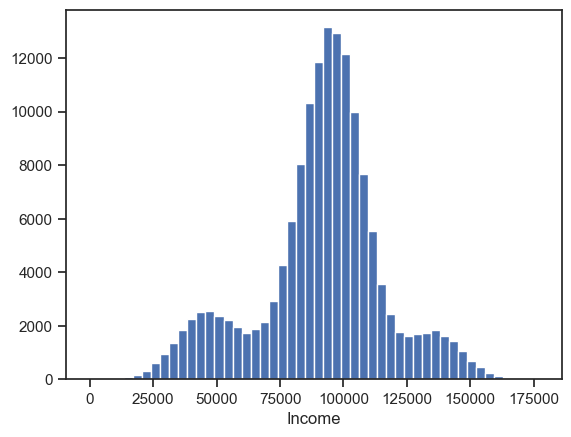

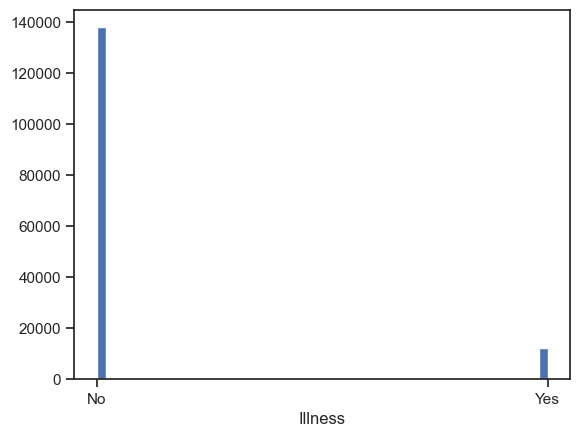

In [7]:
# Гистограмма по признакам
for col in data:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

Колонка Number для нас не показательна - это просто порядковый номер. 
Будем анализировать, как коррелируют между собой остальные признаки:
-City
-Gender
-Age
-Income 
-Illness 

In [8]:
df = pd.DataFrame(data)
  
# Applying the condition
df['Gender'].mask(df['Gender'] == 'Female', 0, inplace=True)
df['Gender'].mask(df['Gender'] == 'Male', 1, inplace=True)
df['Illness'].mask(df['Illness'] == 'Yes', 1, inplace=True)
df['Illness'].mask(df['Illness'] == 'No', 0, inplace=True)
data['Gender'] = pd.to_numeric(data['Gender'], errors='coerce')
data['Illness'] = pd.to_numeric(data['Illness'], errors='coerce')
data = data.drop(columns='Number') 
data.dtypes
data.head()

,City,Gender,Age,Income,Illness
0,Dallas,1,41,40367.0,0
1,Dallas,1,54,45084.0,0
2,Dallas,1,42,52483.0,0
3,Dallas,1,40,40941.0,0
4,Dallas,1,46,50289.0,0


<AxesSubplot:>

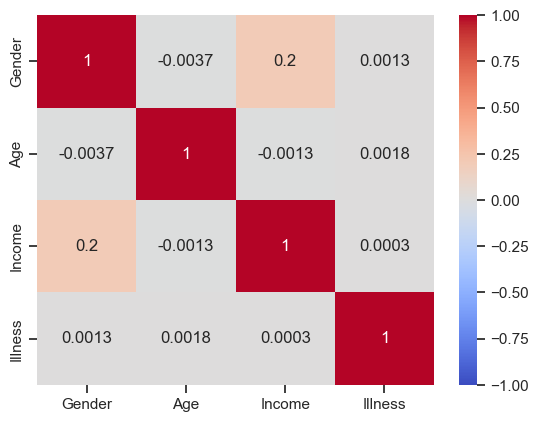

In [9]:
 sns.heatmap(data.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

Можно сделать вывод, что наличие заболеваний не зависит напрямую от пола,  дохода и возраста, а лишь доход кореллирует с полом. 
На данном датасете модель построить сложно, так как нет явной зависимости между данными напрямую. 
А если бы мы добавили данные, у которых нашлась бы корреляция, то построение модели стало бы возможным. Допустим, напрямую коррелирующие данные о кредите.

Cделаем парную диаграмму по полу, возрасту, доходу и наличию заболеваний, разделенную по городу. 

In [ ]:
df3 = data.loc[:150000, :]
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df3[['Gender', 'Age', 'Income', 'Illness', "City"]], kind="scatter", hue="City", plot_kws=dict(s=30))
plt.show()

<Figure size 800x640 with 0 Axes>